<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/Final_Project_ML2_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT FOR TEAM
---
Kaggle Summary – Credit Card Fraud Detection Dataset

* Instances: 284,807 transactions

* Features: 30 total (28 PCA features + Time, Amount)

* Target: Class (1 = Fraud, 0 = Not Fraud)

* Data Type: All numerical

* Fraud Rate: 0.172% (492 frauds)

#**Libraries**



In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#**Loading The Data**

In [32]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "creditcard.csv"

C_card = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path)

<ipython-input-32-71c1936db49a>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  C_card = kagglehub.load_dataset(


##**Dataset Understanding**

In [33]:
#Data types overview
C_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [34]:
C_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 **Note**  :  ***V1 - V28***  are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

#**Data preprocessing and feature engineering**

In [35]:
# Remove irrelevant feature

C_card = C_card.drop(['Time'] , axis = 1)

In [36]:
#split the data
x = C_card.drop(['Class'], axis=1)
y = C_card['Class']

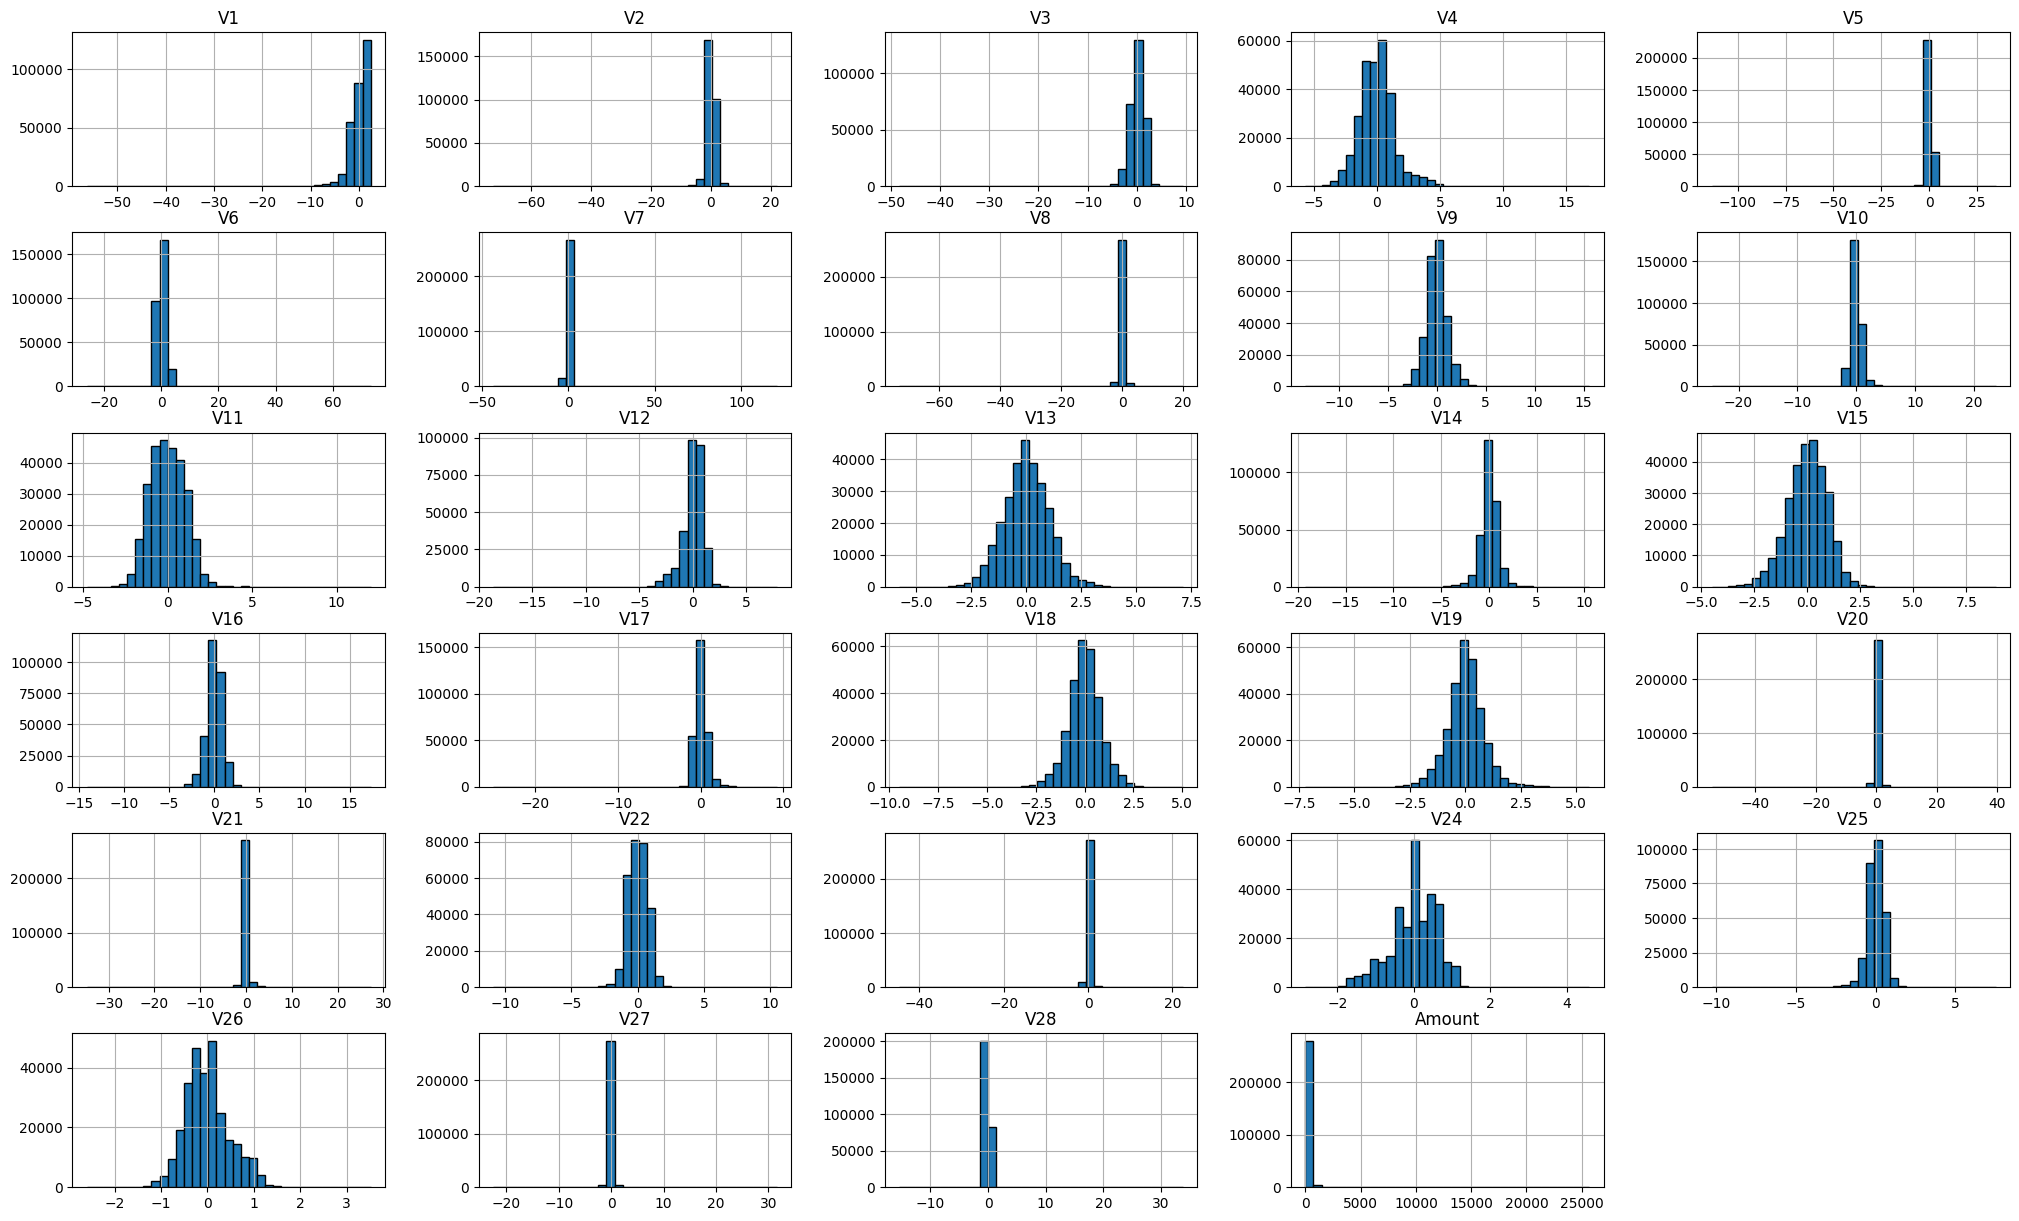

In [37]:
#Visualize feature distribution

x.hist(figsize=(25, 15), bins=35, edgecolor='black')
plt.show()

**The Histogram** shows 25 histograms for variables V1 to V28 and Amount, indicating mostly non-normal distributions with varying skewness.

---



In [38]:
#Left Skewed
# x[["V1", "V2", "V6", "V7", "V11", "V15", "V16", "V17", "V21", "V22", "V23", "V24", "V26", "V27", "V28"]]

# #Right Skewed
# x[[ "V5", "V10", "V12", "V18", "V25","Amount"]]

# cols = ["V1", "V2", "V6", "V7", "V11", "V15", "V16", "V17", "V21", "V22", "V23", "V24", "V26", "V27", "V28","V5", "V10", "V12", "V18", "V25", "Amount"]

# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson') #yeo-johnson ← A safe method to transform negative and positive values ​​to be closer to a normal distribution.
# x[cols] = pt.fit_transform(x[cols])

##**Highly imbalanced**

**Since the data is unbalanced, we need to apply appropriate techniques to balance it.**

Class
0    284315
1       492
Name: count, dtype: int64


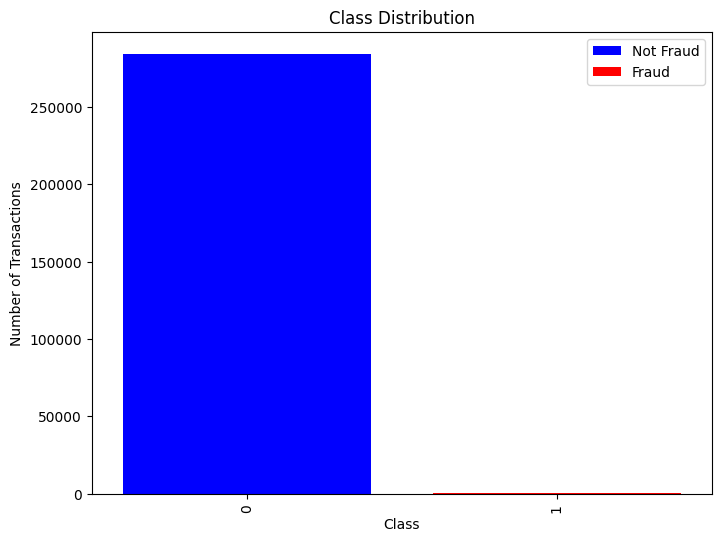

In [39]:
Label_counts = y.value_counts()

print(Label_counts)

plt.figure(figsize=(8, 6))
bars = plt.bar(Label_counts.index, Label_counts.values, color=['blue', 'red'])

Label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.legend(bars , ['Not Fraud' , 'Fraud'])
plt.show()


> **This plot indicates that the dataset is imbalanced.**




In [40]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

By using *RandomUnderSampler*, you are creating a new dataset where the number of instances in the fraud and non-fraud classes is equal ,
**which can lead to better model performance**




Class
0    492
1    492
Name: count, dtype: int64


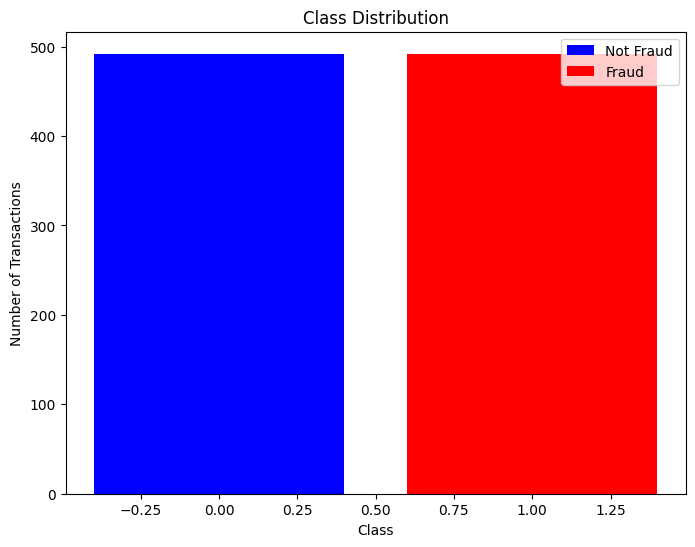

In [41]:
Balanced_Label_counts = y_resampled.value_counts()

print(Balanced_Label_counts)

plt.figure(figsize=(8, 6))
bars = plt.bar(Balanced_Label_counts.index, Balanced_Label_counts.values, color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.legend(bars , ['Not Fraud' , 'Fraud'])
plt.show()

**Now we can say that the data is balanced, yeah!**

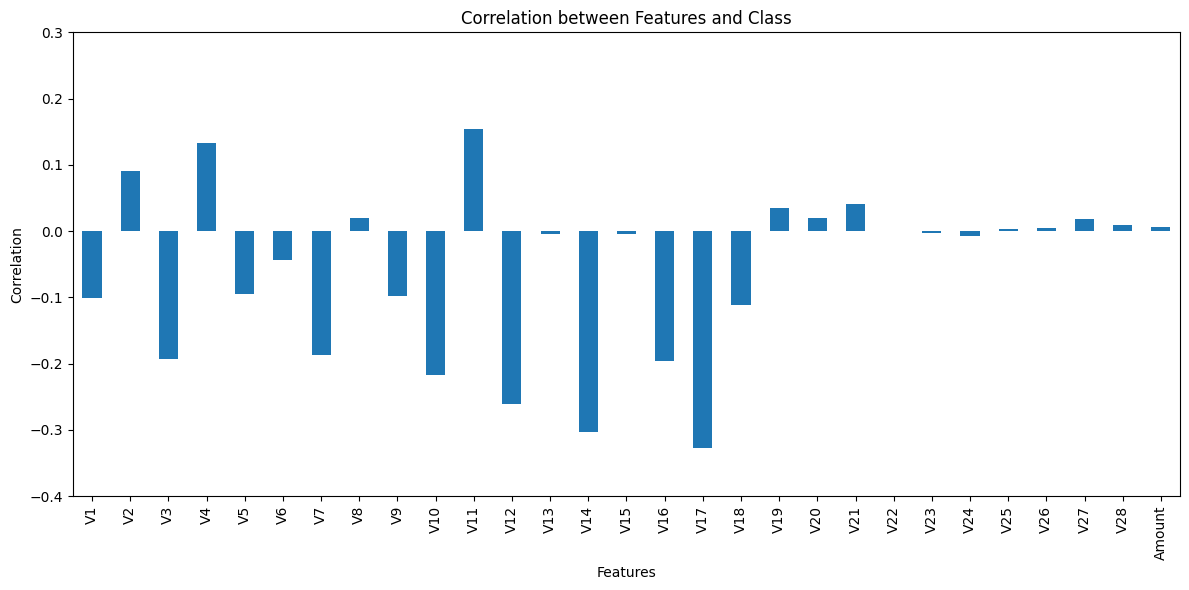

In [42]:
correlation_matrix = x.corrwith(y)
plt.figure(figsize=(12, 6))
correlation_matrix.plot(kind='bar')
plt.title('Correlation between Features and Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks()
plt.ylim(-0.4, 0.3)
plt.tight_layout()
plt.show()

In [43]:
correlation_matrix=x_resampled.corr().round(6)

**Heatmap for the correlation between matricies**

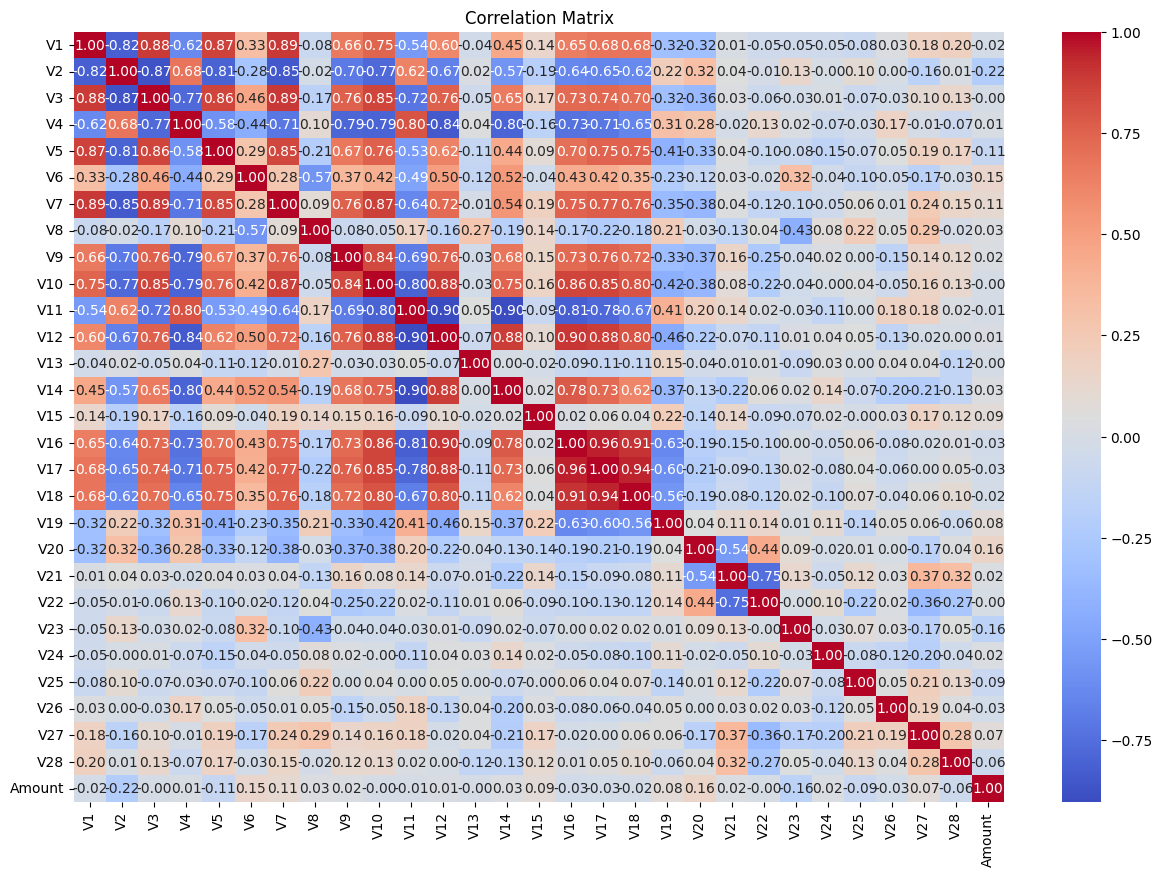

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [45]:
#We decided to choose these features because they show a high correlation with eachother.
x_resampled["v16+v17"]=x_resampled["V16"]+x_resampled["V17"]
x_resampled["v17+v18"]=x_resampled["V17"]+x_resampled["V18"]
#x_resampled["v16*v17"]=x_resampled["V16"]*x_resampled["V17"]
#x_resampled["v17+v18"]=x_resampled["V17"]*x_resampled["V18"]
x_resampled["v16+v18"]=x_resampled["V16"]+x_resampled["V18"]
x_resampled["v11+v12"]=x_resampled["V11"]+x_resampled["V12"]

In [46]:
# We applied a scaler to the new feature and Amount because the V1–V28 features was  already scaled by the  PCA from the original data .
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_resampled[["Amount","v16+v18","v16+v17","v17+v18","v11+v12"]] = scaler.fit_transform(x_resampled[["Amount","v16+v18","v16+v17","v17+v18","v11+v12"]])


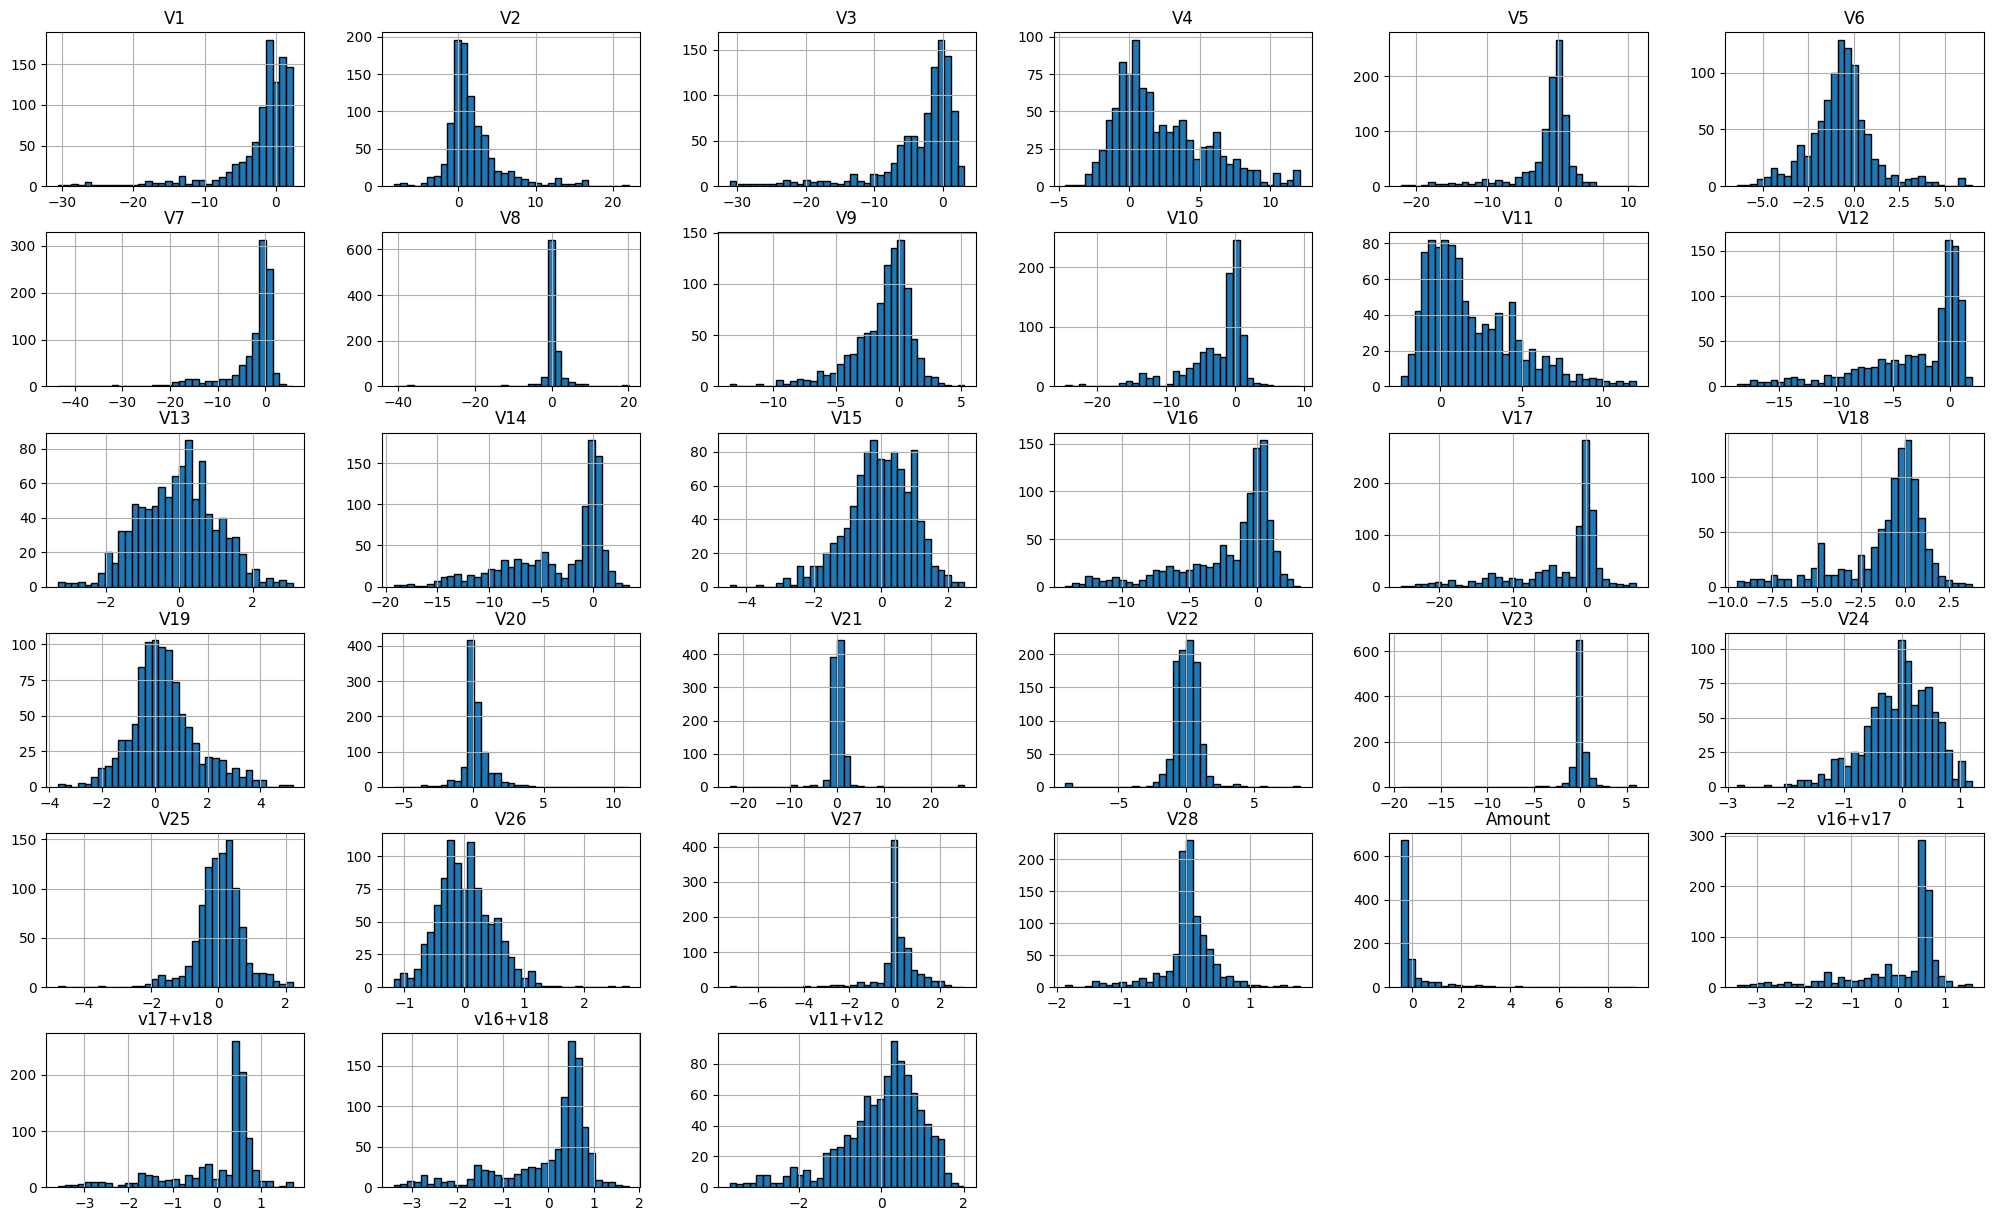

In [47]:
x_resampled.hist(figsize=(25, 15), bins=35, edgecolor='black')
plt.show()

After balancing the data, we obtained a better distribution plot that supports improved generalization.

#Dimensionality reduction (PCA, t-SNE)

In [48]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
x_pca = pca.fit_transform(x_resampled)

In [49]:
# Analyze explained variance
explained_variance = pca.explained_variance_ratio_.round(3)
explained_variance

array([0.68 , 0.099, 0.073, 0.037, 0.032, 0.011, 0.008, 0.008, 0.007,
       0.006, 0.005, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

 The first principal component explains the largest amount of variance, about 68%. This means most of the important information in the data is captured by the first component. The remaining components explain less variance.

---

**explained variance**  --> It helps determining how many principal components needed to retain in order to preserve most of the information from the original dataset, while reducing the dimensionality without significant loss of important data.



In [50]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca_reduced.fit_transform(x_resampled)

the minimum number of components preserving 90–95% variance: 9


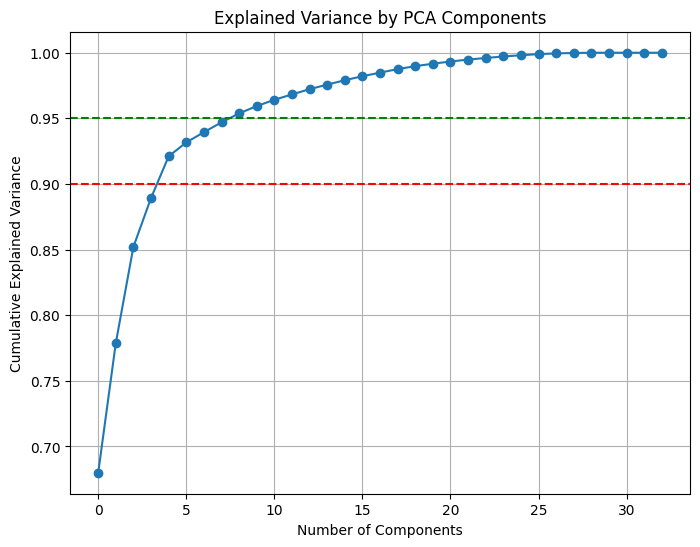

In [51]:
# cv = cumulative_variance
cv = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(cv, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

To preserve 90-95 % of the total variance in the dataset, 9 principal components are required. This indicates that the original high-dimensional data can be reduced to just 9 components while still retaining most of its essential information and structure.

---





In [52]:
pca_reduced = PCA(n_components=n_components,random_state=42)
x_pca_reduced = pca_reduced.fit_transform(x_resampled)
x_pca_reduced.shape

(984, 9)

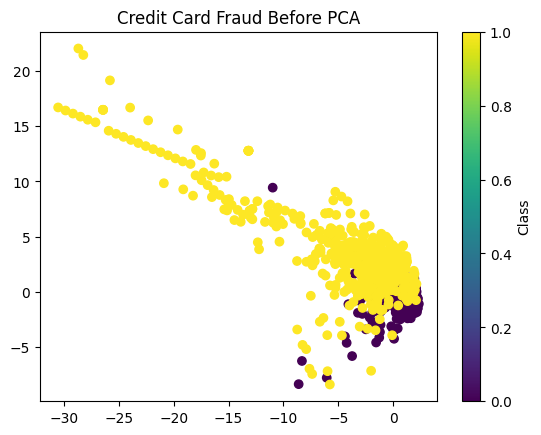

In [53]:
plt.scatter(x_resampled.iloc[:, 0], x_resampled.iloc[:, 1], c=y_resampled)
plt.title('Credit Card Fraud Before PCA')
plt.colorbar(label='Class')
plt.show()

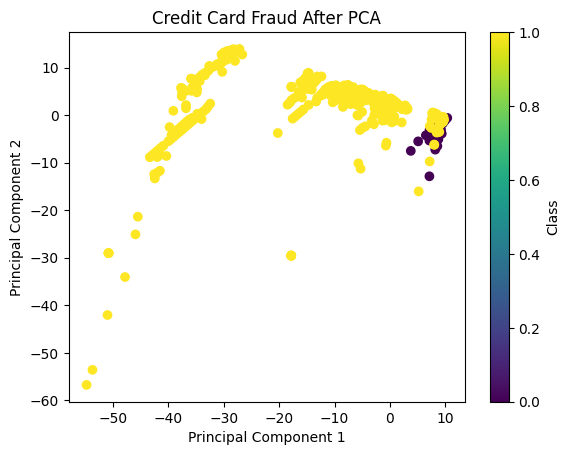

In [54]:
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=y_resampled)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Credit Card Fraud After PCA')
plt.colorbar(label='Class')
plt.show()

**Appearing in the "PCA PLOT" the highest variance component is the first principal component**

##TSNE

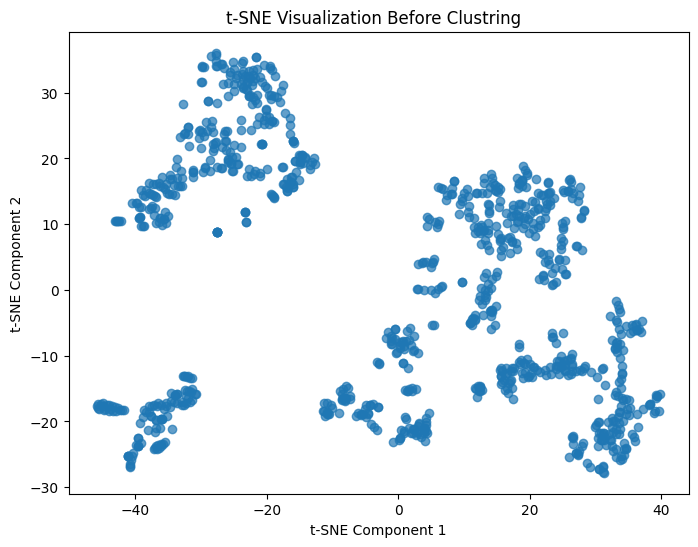

In [65]:
from sklearn.manifold import TSNE

tsne = TSNE( random_state=42)
X_tsne_before = tsne.fit_transform(x_pca_reduced)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne_before[:,0], X_tsne_before[:,1] , alpha=0.7)
plt.title('t-SNE Visualization Before Clustring  ')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [56]:
from sklearn.cluster import KMeans
kmeans_standerd = KMeans(n_clusters=2,n_init=20,init='random',  random_state=42).fit(x_pca_reduced)
clusters = kmeans_standerd.fit_predict(x_pca_reduced)

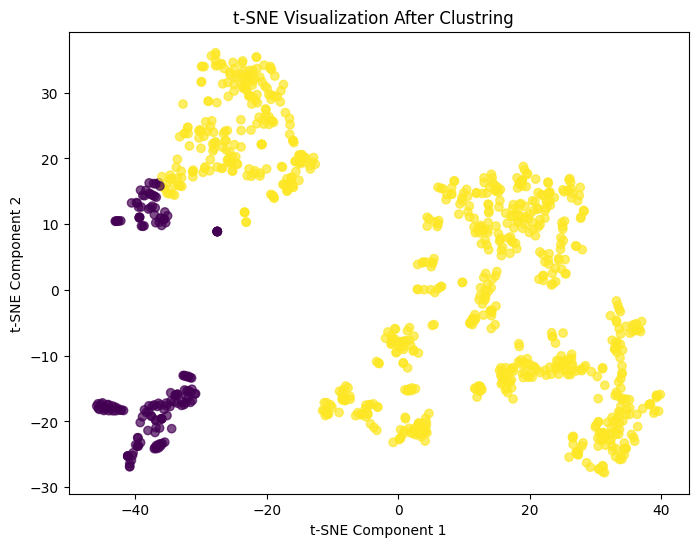

In [57]:
X_tsne_after = tsne.fit_transform(x_pca_reduced)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne_after[:,0], X_tsne_after[:,1], c=clusters , alpha=0.7)
plt.title('t-SNE Visualization After Clustring  ')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

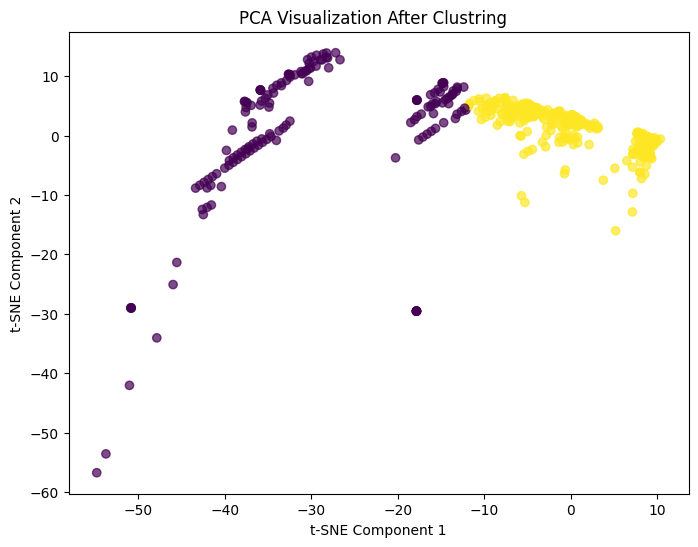

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca_reduced[:,0], x_pca_reduced[:,1], c=clusters , alpha=0.7)
plt.title('PCA Visualization After Clustring  ')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

**According to the T-SNE PLOT it's keeping similar data points close together in the reduced space by maintaining small pairwise distances.**

# Clustering

**Plot Inertia vs k and Silhouette score vs k.**

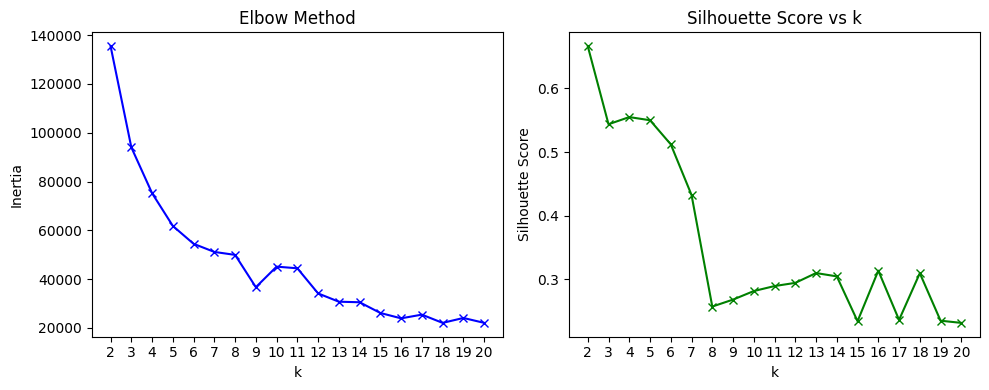

According to the silhouette score the best k is 2 with score 0.6663


In [59]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)

for k in K:
    kmeans1 = KMeans(n_clusters=k,init='random', random_state=42)
    kmeans1.fit(x_pca_reduced)
    kmeans_per_k[k] = kmeans1
    inertias.append(kmeans1.inertia_)
    score = silhouette_score(x_pca_reduced, kmeans1.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

best_k_index = np.argmax(silhouette_scores)
best_k_value = K[best_k_index]
best_silhouette_score = silhouette_scores[best_k_index]

print(f'According to the silhouette score the best k is {best_k_value} with score {best_silhouette_score:.4f}')

**Visualizing Silhouette Scores for K-Means Clustering**

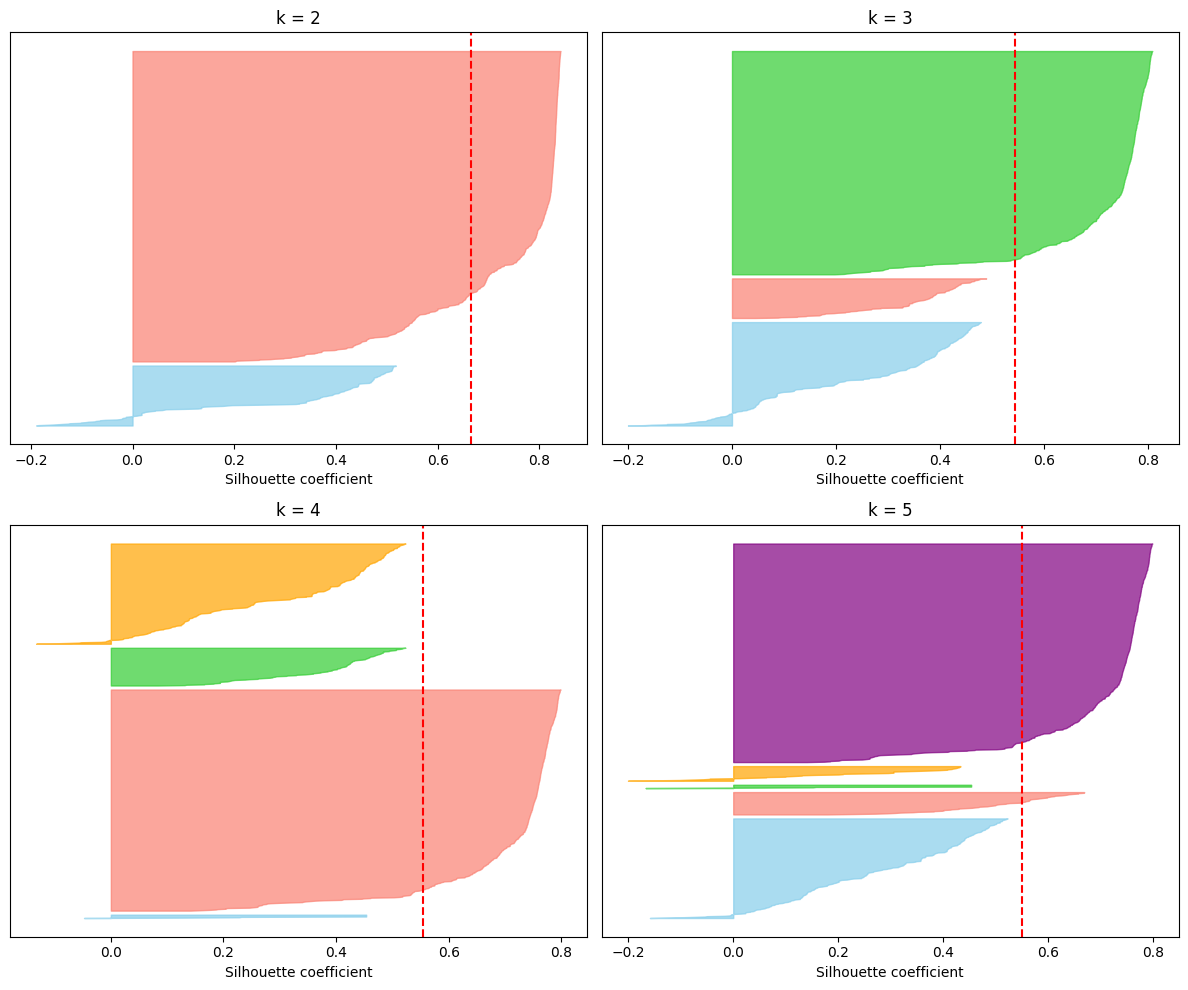

In [64]:
ks = [2, 3, 4, 5]

colors = ['skyblue', 'salmon', 'limegreen', 'orange', 'purple', 'gold', 'teal']

plt.figure(figsize=(12, 10))

for id, k in enumerate(ks, 1):
    labels   = KMeans(n_clusters=k, init = 'random', random_state=42).fit_predict(x_pca_reduced)
    sil_vals = silhouette_samples(x_pca_reduced, labels)

    plt.subplot(2, 2, id)
    y_lower = 10
    for i in range(k):
        cluster_vals = np.sort(sil_vals[labels == i])
        size = len(cluster_vals)
        y_upper = y_lower + size
        color = colors[i % len(colors)]
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10

    plt.axvline(sil_vals.mean(), color='red', linestyle='--')
    plt.title(f"k = {k}")
    plt.yticks([])
    plt.xlabel("Silhouette coefficient")

plt.tight_layout()
plt.show()

##kmeans ++

In [82]:
kmeans_p = KMeans(n_clusters=2,init="k-means++" , random_state=42).fit(x_pca_reduced)
clusters1 = kmeans_p.fit_predict(x_pca_reduced)

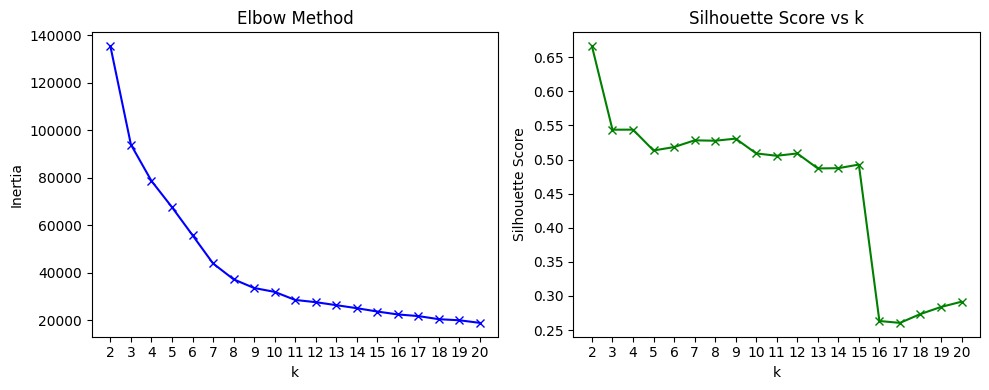

According to the silhouette score the best k is 2 with score 0.6663


In [80]:
inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)

for k in K:
    kmeans2 = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans2.fit(x_pca_reduced)
    kmeans_per_k[k] = kmeans2
    inertias.append(kmeans2.inertia_)
    score = silhouette_score(x_pca_reduced, kmeans2.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

best_k_index = np.argmax(silhouette_scores)
best_k_value = K[best_k_index]
best_silhouette_score = silhouette_scores[best_k_index]

print(f'According to the silhouette score the best k is {best_k_value} with score {best_silhouette_score:.4f}')

**Show how initialization impacts convergence and results**

In [83]:
#1
print("K-Means Iterations:", kmeans_standerd.n_iter_)
print("K-Means++ Iterations:", kmeans_p.n_iter_)
print("------------------------------------------------------------")

#2
print("K-Means Silhouette Score:", silhouette_score(x_pca_reduced, kmeans_standerd.labels_))
print("K-Means++ Silhouette Score:", silhouette_score(x_pca_reduced, kmeans_p.labels_))

K-Means Iterations: 9
K-Means++ Iterations: 4
------------------------------------------------------------
K-Means Silhouette Score: 0.6663139555198238
K-Means++ Silhouette Score: 0.6663139555198238


**Compare standard K-Means standard and K-Means++.**

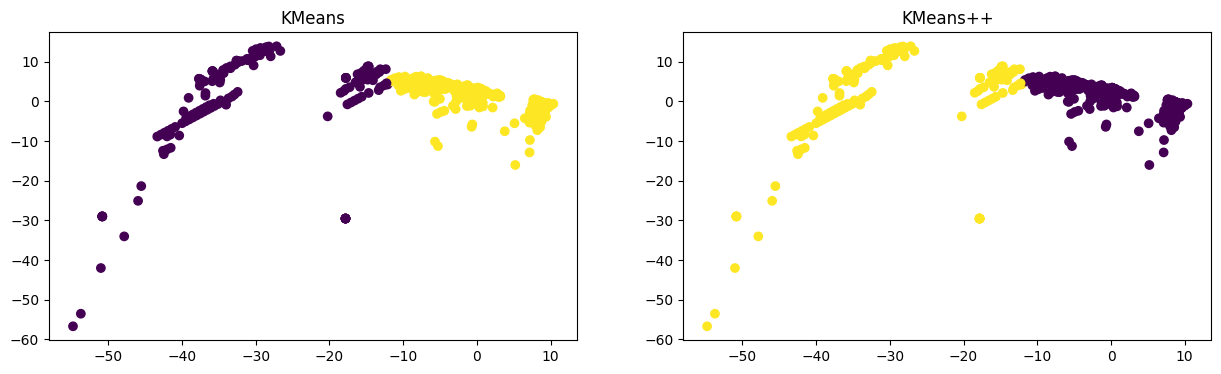

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
plt.show()

##MiniBatchKMeans

In [85]:
from sklearn.cluster import MiniBatchKMeans
minikmeans=MiniBatchKMeans(n_clusters=2, random_state=42)
minikmeans.fit(x_pca_reduced)

MiniBatchKMeans(n_clusters=2, random_state=42)

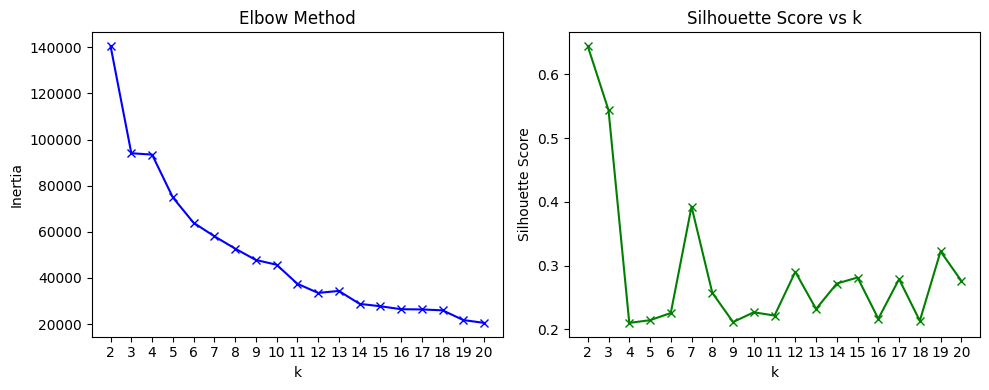

According to the silhouette score the best k is 2 with score 0.6439


In [87]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)

for k in K:
    minikeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    minikeans.fit(x_pca_reduced)
    kmeans_per_k[k] = minikeans
    inertias.append(minikeans.inertia_)
    score = silhouette_score(x_pca_reduced, minikeans.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

best_k_index = np.argmax(silhouette_scores)
best_k_value = K[best_k_index]
best_silhouette_score = silhouette_scores[best_k_index]

print(f'According to the silhouette score the best k is {best_k_value} with score {best_silhouette_score:.4f}')

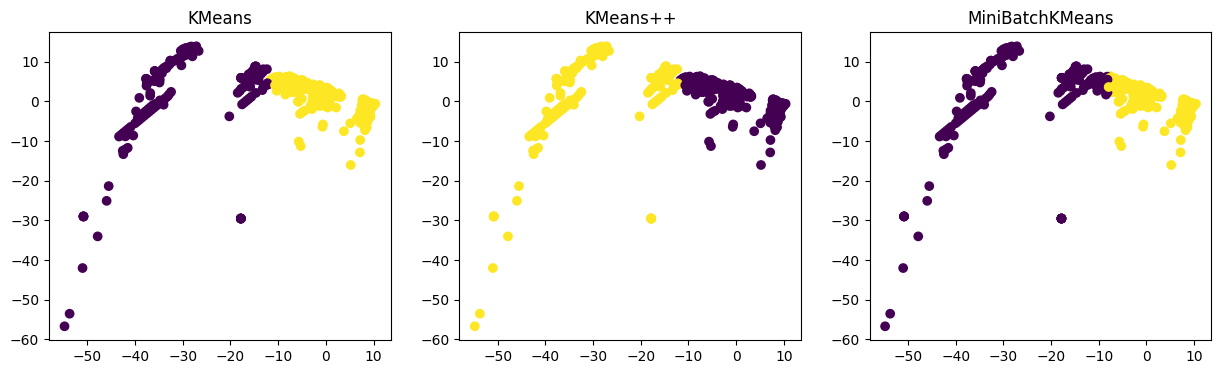

In [88]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
axs[2].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=minikmeans.labels_)
axs[2].set_title("MiniBatchKMeans")
plt.show()

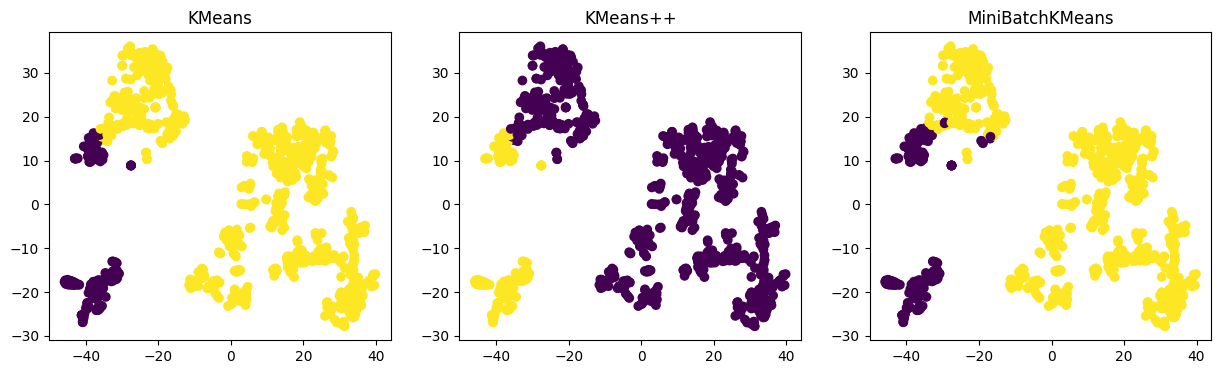

In [91]:
x_tsne = TSNE(random_state=42).fit_transform(x_pca_reduced)
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(x_tsne[:, 0], x_tsne[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(x_tsne[:, 0], x_tsne[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
axs[2].scatter(x_tsne[:, 0], x_tsne[:, 1], c=minikmeans.labels_)
axs[2].set_title("MiniBatchKMeans")
plt.show()

**Compare speed, memory usage, and accuracy with standard K-Means.**

In [92]:
!pip install memory_profiler

In [99]:
import time
start_time = time.time()
minikmeans=MiniBatchKMeans(n_clusters=2, random_state=42)
minikmeans.fit(x_pca_reduced)
end_time = time.time()
mini_batch_cluster_labels = minikmeans.labels_
mini_batch_time = end_time-start_time

mini_batch_silhouette = silhouette_score(x_pca_reduced, mini_batch_cluster_labels)

print("Mini-Batch K-Means:")
print(f"  Time taken: {mini_batch_time:.4f} seconds")
print(f"  Silhouette Score: {mini_batch_silhouette}")


start_time = time.time()
kmeans = KMeans(n_clusters=2, init = 'random' , random_state=42)
kmeans.fit(x_pca_reduced)
end_time = time.time()
kmeans_time = end_time - start_time

kmeans_silhouette = silhouette_score(x_pca_reduced, kmeans.labels_)

print("\nStandard K-Means:")
print(f"  Time taken: {kmeans_time:.4f} seconds")
print(f"  Silhouette Score: {kmeans_silhouette}")


print("\nComparison:")
print(f"  Time difference: {mini_batch_time - kmeans_time:.4f} seconds")
print(f"  Silhouette difference: {abs(mini_batch_silhouette - kmeans_silhouette):.4f}")


Mini-Batch K-Means:
  Time taken: 0.0139 seconds
  Silhouette Score: 0.6439016541392862

Standard K-Means:
  Time taken: 0.0344 seconds
  Silhouette Score: 0.6663139555198238

Comparison:
  Time difference: -0.0204 seconds
  Silhouette difference: 0.0224


In [97]:
from memory_profiler import memory_usage

def kmeans():
    kmeans = KMeans(n_clusters=2 , random_state=42)
    kmeans.fit(x_pca_reduced)

def kmeans_minibatch():
    minikmeans=MiniBatchKMeans(n_clusters=2, random_state=42)
    minikmeans.fit(x_pca_reduced)

mem_standerd = memory_usage(kmeans)
mem_mini = memory_usage(kmeans_minibatch)

print("standerd Memory Usage:", max(mem_standerd), "MiB")
print("mini_batch  Memory Usage:", max(mem_mini), "MiB")

standerd Memory Usage: 1033.53125 MiB
mini_batch  Memory Usage: 1033.53125 MiB


 **Note:**

1.   The memory usage appears similar for both KMeans and MiniBatchKMeans.



2.   This is likely because the dataset is relatively small, and PCA has already reduced its dimensions.





3.   MiniBatchKMeans shows clear memory and speed advantages mainly with large-scale data.



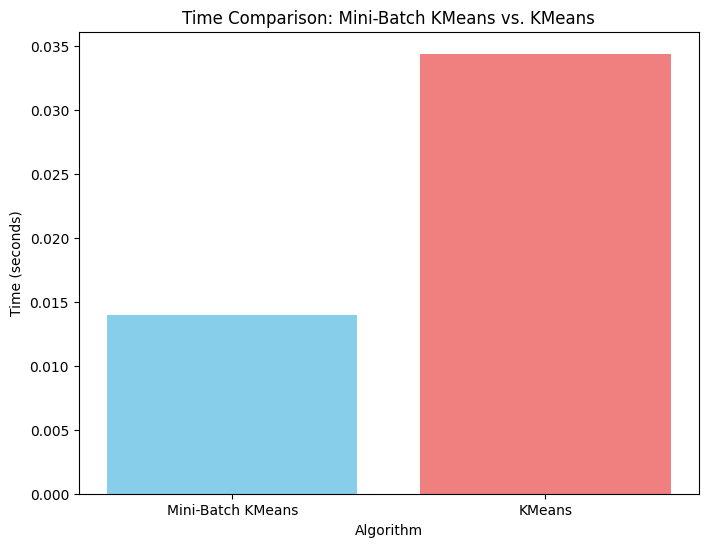

In [100]:
algorithms = ['Mini-Batch KMeans', 'KMeans']
times = [mini_batch_time, kmeans_time]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, times, color=['skyblue', 'lightcoral'])
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Time Comparison: Mini-Batch KMeans vs. KMeans')
plt.show()

##DBSCAN

In [101]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
labels = dbscan.fit_predict(x_pca_reduced)
label_counts = pd.Series(labels).value_counts().sort_index()

print(label_counts)

-1     799
 0      72
 1       5
 2      58
 3       9
 4       5
 5       7
 6       6
 7       5
 8       5
 9       7
 10      6
Name: count, dtype: int64


In [ ]:

# epsilon = np.linspace(0.01,1, 20)
# min_samples = np.arange(2,25, step = 2)
# import itertools
# combinations = list(itertools.product(epsilon,min_samples))
# N= len(combinations)
# N

In [ ]:
# import itertools

# def Gridsearch(combinations, X):
#     scores = []
#     all_label = []

#     for i, (eps, num_samples) in enumerate(combinations):
#         dbscan_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
#         labels = dbscan_model.labels_
#         labels_set = set(labels)
#         num_clusters = len(labels_set) - (1 if -1 in labels_set else 0)

#         if (num_clusters < 2) or (num_clusters > 25):
#             scores.append(-1)
#             all_label.append("Poor")
#             print(f"at iteration : {i}, eps = {eps}, min_samples = {num_samples}, number of clusters = {num_clusters}, moving on ...")
#             continue

#         scores.append(silhouette_score(X, labels))
#         all_label.append(labels)
#         print(f"at iteration : {i}, score = {scores[-1]}, Number of clusters : {num_clusters}")

#     if not scores or all(score == -1 for score in scores):
#          return {
#             'best_epsilon': None,
#             'best_min_samples': None,
#             'best_labels': None,
#             'best_score': -1
#         }

#     best_index = np.argmax(scores)
#     best_parameters = combinations[best_index]
#     best_labels = all_label[best_index]
#     best_score = scores[best_index]

#     return {
#         'best_epsilon': best_parameters[0],
#         'best_min_samples': best_parameters[1],
#         'best_labels': best_labels,
#         'best_score': best_score
#     }

# epsilon = np.linspace(0.1, 3, 20)
# min_samples = np.arange(2, 25, step=2)
# combinations = list(itertools.product(epsilon, min_samples))

# result = Gridsearch(combinations, x_pca_reduced)

# print(f"Best eps: {result['best_epsilon']}")
# print(f"Best min_samples: {result['best_min_samples']}")
# print(f"Best score: {result['best_score']}")


In [ ]:
# from sklearn.model_selection import GridSearchCV



# def silhouette_scorer(estimator, Mall_data):
#     labels = estimator.fit_predict(Mall_data)
#     if len(set(labels)) > 1 and -1 not in set(labels):
#         return silhouette_score(Mall_data, labels)
#     else:
#         return -1

# dbscan_grid={'eps': [0.1,0.3,0.5,0.7,0.9,2,3,4,5,6,7,],
#     'min_samples':[15,10,5,7,4]}

# dbscanSearch=GridSearchCV(DBSCAN() , dbscan_grid , scoring=silhouette_scorer)

# dbscanSearch.fit(x_pca_reduced)
# print(dbscanSearch.best_params_)
# print(dbscanSearch.best_score_)

In [ ]:
best_dbscan = DBSCAN(eps=6, min_samples=10)
labels = best_dbscan.fit_predict(x_pca_reduced)
label_counts = pd.Series(labels).value_counts().sort_index()
print(label_counts)

In [ ]:
silhouette = silhouette_score(x_pca_reduced, labels)
print("Silhouette Score:", silhouette)

In [ ]:


fig, axs = plt.subplots(1, 2, figsize=(15, 4))

unique_db_labels = np.unique(best_dbscan.labels_)
colors_db = plt.cm.viridis(np.linspace(0, 1, len(unique_db_labels)))

for i, label in enumerate(unique_db_labels):
    mask = (best_dbscan.labels_ == label)
    if label == -1:
        axs[0].scatter(x_pca_reduced[mask, 0], x_pca_reduced[mask, 1], c='gray', label='Outliers', s=10)
    else:
        axs[0].scatter(x_pca_reduced[mask, 0], x_pca_reduced[mask, 1], c=[colors_db[i]], label=f'Cluster {label}', s=10)

axs[0].set_title("DBSCAN")
axs[0].legend(loc='best')
unique_km_labels = np.unique(kmeans_standerd.labels_)
colors_km = plt.cm.viridis(np.linspace(0, 1, len(unique_km_labels)))

for i, label in enumerate(unique_km_labels):
    mask = (kmeans_standerd.labels_ == label)
    axs[1].scatter(x_pca_reduced[mask, 0], x_pca_reduced[mask, 1], c=[colors_km[i]], label=f'Cluster {label}', s=10)

axs[1].set_title("KMeans")
axs[1].legend(loc='best')

plt.show()

##Anomaly detection

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
forest.fit(x_resampled)
forest_predict = forest.predict(x_resampled)
forest_labels = np.where(forest_predict == -1, 1, 0)

In [ ]:
svm = OneClassSVM(gamma='auto', nu=0.1)
svm.fit(x_resampled)
svm_predict = svm.predict(x_resampled)
svm_labels = np.where(svm_predict == -1, 1, 0)

In [ ]:
conf_forest = confusion_matrix(y_resampled, forest_labels)
print("\nIsolation Forest:\n",conf_forest )
conf_svm = confusion_matrix(y_resampled, svm_labels)
print("Confusion Matrix:\n",conf_svm )

In [ ]:
forest_precision = precision_score(y_resampled, forest_labels)
forest_recall = recall_score(y_resampled, forest_labels)
forest_f1 = f1_score(y_resampled, forest_labels)
print(f"Precision: {forest_precision:.4f}")
print(f"Recall: {forest_recall:.4f}")
print(f"F1-Score: {forest_f1:.4f}")

In [ ]:
svm_precision = precision_score(y_resampled, svm_labels)
svm_recall = recall_score(y_resampled, svm_labels)
svm_f1 = f1_score(y_resampled, svm_labels)
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")

In [ ]:
if forest_f1 > svm_f1:
    better_model = "Isolation Forest"
    better_score = forest_f1
    worse_model = "One-Class SVM"
    worse_score = svm_f1
elif svm_f1 > forest_f1:
     better_model = "One-Class SVM"
     better_score = svm_f1
     worse_model = "Isolation Forest"
     worse_score = forest_f1
else:
    better_model = "Neither"
    better_score = forest_f1

print(f"Based on the F1-Score : {better_model} performs better (F1 = {better_score:.4f}) compared to {worse_model} (F1 = {worse_score:.4f}).")
print("Looking at other metrics:")
print(f"Isolation Forest: Precision={forest_precision:.4f}, Recall={forest_recall:.4f}")
print(f"One-Class SVM: Precision={svm_precision:.4f}, Recall={svm_recall:.4f}")

In [ ]:
print("\nReasons for performance difference")
print("- Isolation Forest works by randomly partitioning data points and measuring how 'isolated' they are. It's often effective in high-dimensional spaces and less sensitive to the density of the data compared to density-based methods.")
print("- One-Class SVM tries to find a hyperplane that separates the training data from the origin (or other data). Its performance can be sensitive to the kernel choice and the 'nu' parameter, which controls the trade-off between finding a tight boundary and allowing some training errors.")
print("- Since the models were trained on *resampled* data, they learned the 'normal' pattern from a balanced distribution. This might favor one algorithm over the other depending on how they handle the learned distribution and then detect deviations.")
print("- Isolation Forest might be better at spotting individual outliers even in a balanced dataset, while One-Class SVM might be more focused on defining a compact region for the 'normal' class.")
print("- The performance heavily depends on how well the anomalies (fraud) are truly separable outliers in the feature space used (the PCA reduced features of the resampled data).")

print("\nImportant Consideration:")
print("The evaluation was performed on the *resampled* dataset. A more robust evaluation for anomaly detection would typically involve training the unsupervised models on the *original* non-fraudulent data (or the full dataset with a carefully chosen contamination parameter) and then evaluating their performance on the *original* test set, which maintains the true class imbalance.")
print("The results here reflect performance in identifying anomalies within the modified distribution created by undersampling.")

#Compare clustering performance with and without dimensionality reduction (PCA).

In [ ]:
score1 = silhouette_score(x_pca_reduced, kmeans1.labels_)
score = silhouette_score(x_resampled, kmeans.labels_)
print("Silhouette Score with PCA:", score1)
print("Silhouette Score without PCA:", score)

In [ ]:

start_time1 = time.time()
kmeans1 = KMeans(init='random',n_clusters=2, random_state=42)
kmeans1.fit(x_pca_reduced)
end_time1 = time.time()
kmeans_time = end_time1 - start_time1


start_time = time.time()
kmeans = KMeans(init='random',n_clusters=2, random_state=42)
kmeans.fit(x_resampled)
end_time = time.time()
kmeans_time_without_pca = end_time - start_time


In [ ]:
algorithms = [ 'KMeans with pca reduced','kmeans without pca']
times = [kmeans_time_without_pca, kmeans_time]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, times, color=['skyblue', 'lightcoral'])
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Time Comparison:  KMeans with out pca vs. KMeans with pca')
plt.show()

In [ ]:
kmeans_inertia = kmeans_standerd.inertia_
minibatch_inertia = minikmeans.inertia_

kmeans_silhouette_score = silhouette_score(x_pca_reduced, kmeans_standerd.labels_)
minibatch_silhouette_score = silhouette_score(x_pca_reduced, minikmeans.labels_)

comparison_data = {
    'Metric': ['Inertia Value', 'Silhouette Score', 'Execution Time (seconds)', 'Number of Clusters Found'],
    'KMeans': [kmeans_inertia, kmeans_silhouette_score, kmeans_time, 'N/A'],
    'MiniBatchKMeans': [minibatch_inertia, minibatch_silhouette_score, mini_batch_time, 'N/A'],
    'DBSCAN': ['N/A', silhouette, 'N/A', label_counts]
}

comparison_table = pd.DataFrame(comparison_data)

print("Clustering Algorithm Comparison Table:")
print(comparison_table.to_markdown(index=False, floatfmt=".4f"))
